#**PROJECT ON HEALTH INSURANCE CLAIM AMOUNT PREDICTION**


##**problem statement**
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

##**Data Definition**
**age** : Age of the policyholder (Numeric)

**sex**: Gender of policyholder (Categoric)

**weight**: Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents**: Number of dependent persons on the policyholder (Numeric)

**smoker**: Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim**: The amount claimed by the policyholder (Numeric)

**bloodpressure**: Bloodpressure reading of policyholder (Numeric)

**diabetes**: Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex**: A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title**: Job profile of the policyholder (Categoric)

**city**: The city in which the policyholder resides (Categoric)

**hereditary_diseases**: A policyholder suffering from a hereditary diseases or not (Categoric)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**importing libraries**

In [ ]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn import preprocessing

#**importing dataset**

In [ ]:
# read csv file using pandas
ids = pd.read_csv("/content/drive/MyDrive/Academic_projects/DMMLT_project/healthinsurance.csv")
# display the top 5 rows of the dataframe
ids.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


#**Data Dimension**
To know the dimensions of the data:

In [ ]:
# .shape returns the dimension of the data
ids.shape

(15000, 13)

We see the dataframe has 13 columns and 15000 observations.

#**Data Types**
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.
##**checking data types**

In [ ]:
# use .dtypes to view the data type of a variable
ids.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

##**Change the incorrect data types**

In [ ]:
# use .astype() to change the data type
# convert numerical variables to categorical  

# convert numeric variable 'smoker' to object (categorical) variable
ids.smoker = ids.smoker.astype('object')

# convert numeric variable 'diabetes' to object (categorical) variable
ids.diabetes = ids.diabetes.astype('object')

# convert 'regular_ex' variable to object (categorical) variable
ids.regular_ex = ids.regular_ex.astype('object')

##**Recheck the data types after the conversion**

In [ ]:
# recheck the data types using .dtypes
ids.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

Note the data types are now as per the data definition. Now we can proceed with the analysis.
#**summary statistics**

####**1)for numerical variables we use .describe()**

In [ ]:
# describe the numerical data
ids.describe()

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


 **2)For categorical features, we use .describe(include=object)**

In [ ]:
# describe the categorical data
# include=object: selects the categorical features
ids.describe(include = object)

# Note: If we pass 'include=object' to the .describe(),
#       it will return descriptive statistics for categorical variables only

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


#**Exploratory Data Analysis**
##Checking the distributions of numerical variables

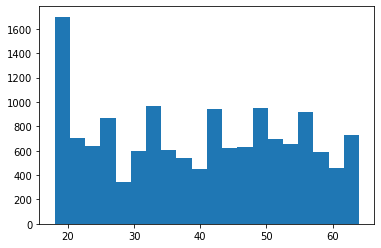

In [ ]:
plt.hist(x=ids['age'],bins= 20)
plt.show()

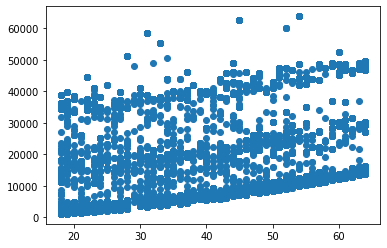

In [ ]:
plt.scatter(x=ids['age'],y= ids["claim"])

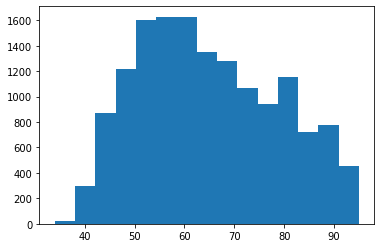

In [ ]:
#weight distn
plt.hist(x=ids['weight'],bins= 15)
plt.show()

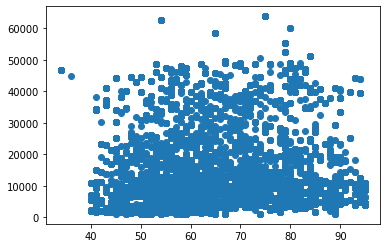

In [ ]:
plt.scatter(x=ids['weight'],y= ids["claim"])

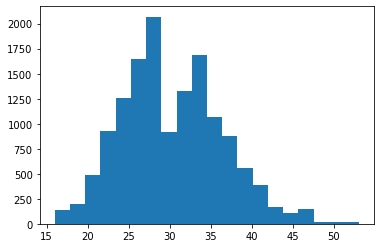

In [ ]:
#bmi distn
plt.hist(x=ids['bmi'],bins= 20)
plt.show()

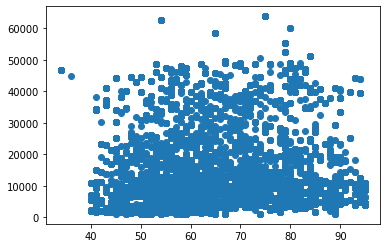

In [ ]:
plt.scatter(x=ids['weight'],y= ids["claim"])

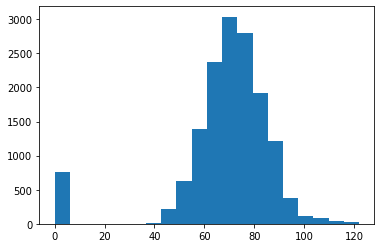

In [ ]:
#bloodpressure distn
plt.hist(x=ids['bloodpressure'],bins= 20)
plt.show()

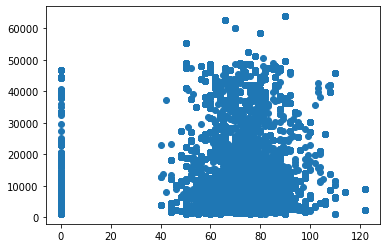

In [ ]:
plt.scatter(x=ids['bloodpressure'],y= ids["claim"])

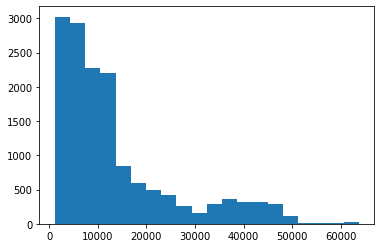

In [ ]:
#claim col distn
plt.hist(x=ids['claim'],bins= 20)
plt.show()

NOTE: Claim is postively skewed, so will apply log transformation at a later date

#**Checking categorical variables**

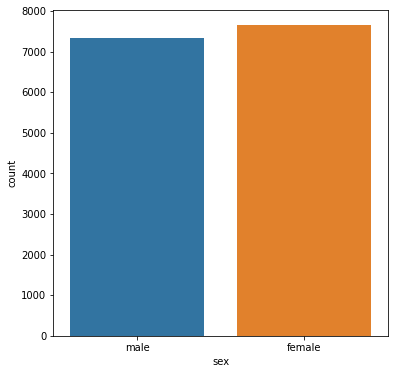

In [ ]:
#sex distn
#bar plot
plt.figure(figsize = (6,6))
sns.countplot(x="sex",data= ids)
plt.show()

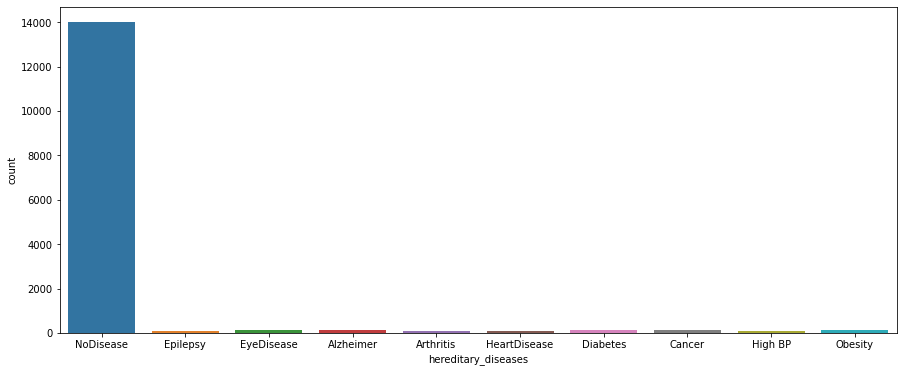

In [ ]:
#hereditary_diseases distn
plt.figure(figsize = (15,6))
sns.countplot(x="hereditary_diseases",data= ids)
plt.show()

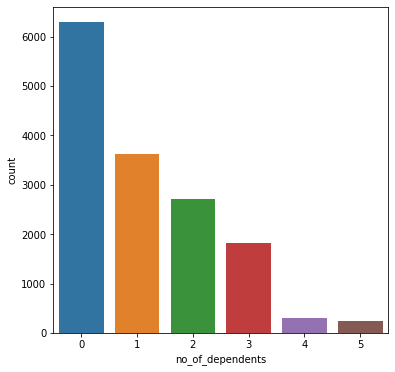

In [ ]:
#no_of_dependents distn
plt.figure(figsize = (6,6))
sns.countplot(x="no_of_dependents",data= ids)
plt.show()

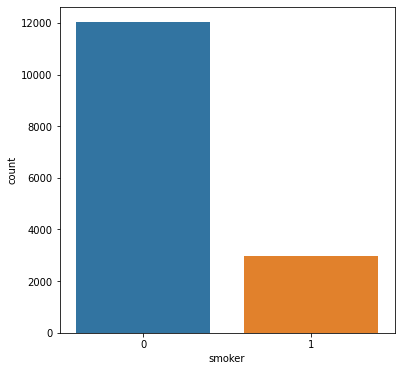

In [ ]:
#smoker distn
plt.figure(figsize = (6,6))
sns.countplot(x="smoker",data= ids)
plt.show()

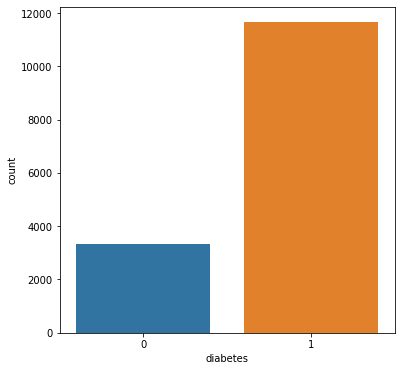

In [ ]:
#diabetes distn 
plt.figure(figsize = (6,6))
sns.countplot(x="diabetes",data= ids)
plt.show()

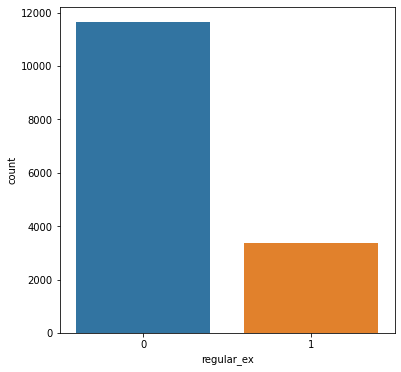

In [ ]:
#regular_ex distn
plt.figure(figsize = (6,6))
sns.countplot(x="regular_ex",data= ids)
plt.show()

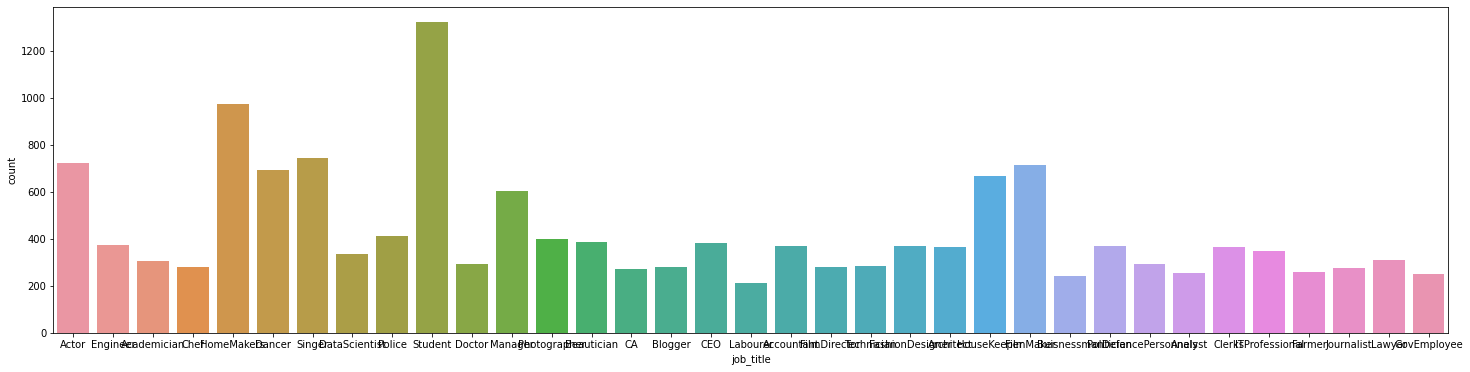

In [ ]:
#job_title distn
plt.figure(figsize = (25,6))
sns.countplot(x="job_title",data= ids)
plt.show()

#**checking outliers**
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.
##recollect that one of the assumptions of linear regression is that there should not be any outliers present in the data

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


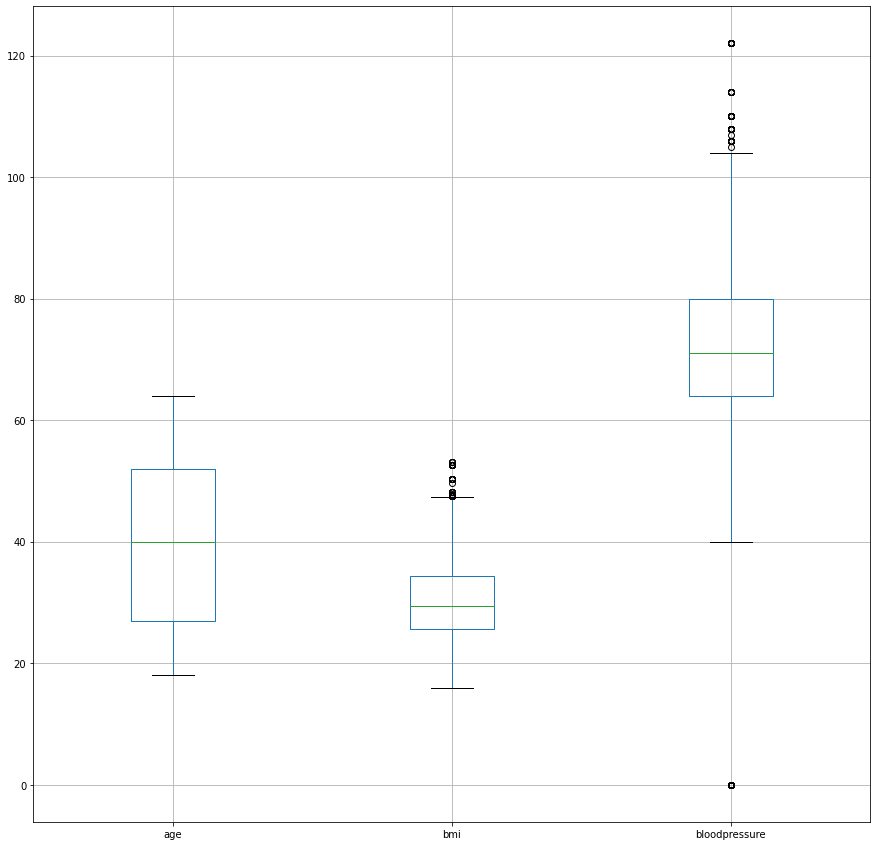

In [ ]:
#set the size
plt.figure(figsize = (15,15))
# create a boxplot for all numeric features
# column: selects the specified columns
ids.boxplot(column=['age','bmi','bloodpressure'])
plt.show()

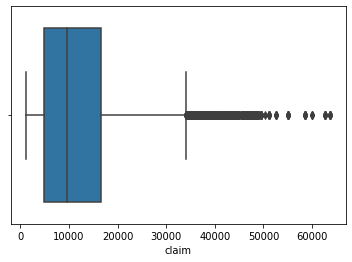

In [ ]:
sns.boxplot(x=ids['claim'])
plt.show()

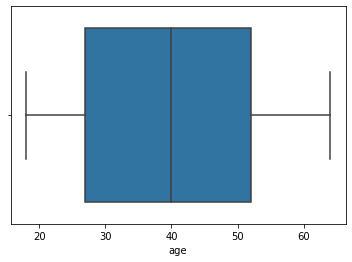

In [ ]:
sns.boxplot(x=ids['age'])
plt.show()

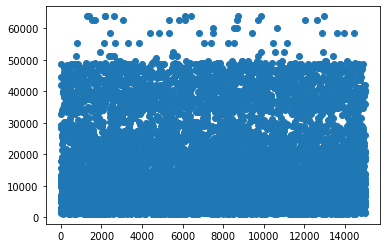

In [ ]:
plt.scatter(ids.index,ids["claim"])

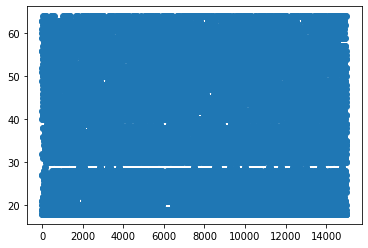

In [ ]:
plt.scatter(ids.index,ids["age"])

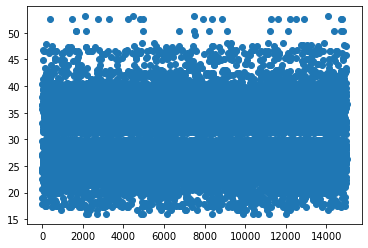

In [ ]:
plt.scatter(ids.index,ids["bmi"])

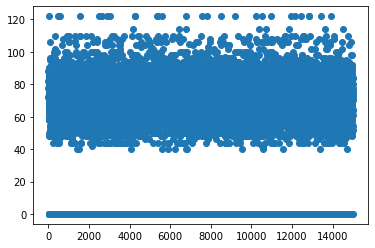

In [ ]:
plt.scatter(ids.index,ids["bloodpressure"])

#**INFERENCES:**
# 1)bmi has outliers
# 2)bloodpressure has outliers
# 3)claim has outliers

#**Handling Outliers**

In [ ]:
max_treshold= ids['bmi'].quantile(0.95)
max_treshold

40.5

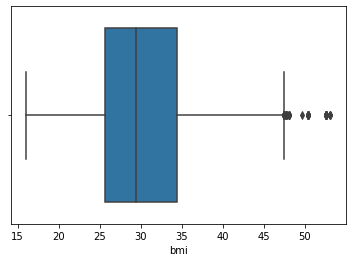

In [ ]:
#plot before handling outliers
sns.boxplot(x=ids['bmi'])
plt.show()

In [ ]:
ids['bmi'][ids['bmi']>max_treshold]= max_treshold

<ipython-input-106-6735ad895042>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['bmi'][ids['bmi']>max_treshold]= max_treshold


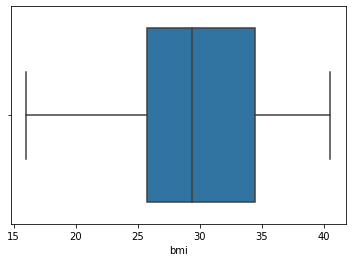

In [ ]:
# after handling outliers
sns.boxplot(x=ids['bmi'])
plt.show()

In [ ]:
#bloodpressure outlier handling
min_treshold2=ids['bloodpressure'].quantile(0.06)
min_treshold2

48.0

In [ ]:
max_treshold2=ids['bloodpressure'].quantile(0.95)
max_treshold2

90.0

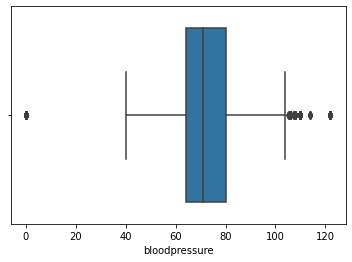

In [ ]:
#before handling outlier 
sns.boxplot(x=ids['bloodpressure'])
plt.show()

In [ ]:
ids['bloodpressure'][ids['bloodpressure']<min_treshold2]= min_treshold2

<ipython-input-111-604a84b50ea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['bloodpressure'][ids['bloodpressure']<min_treshold2]= min_treshold2


In [ ]:
ids['bloodpressure'][ids['bloodpressure']>max_treshold2]= max_treshold2

<ipython-input-112-19a2945e273d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['bloodpressure'][ids['bloodpressure']>max_treshold2]= max_treshold2


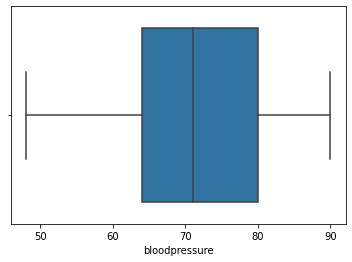

In [ ]:
sns.boxplot(x=ids['bloodpressure'])
plt.show()

#**Missing Values**

In [ ]:
#.isnull().sum() gives the num of outliers in the feature/column
#before handling missing values
ids.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

#**Visualize Missing Values using Heatmap**

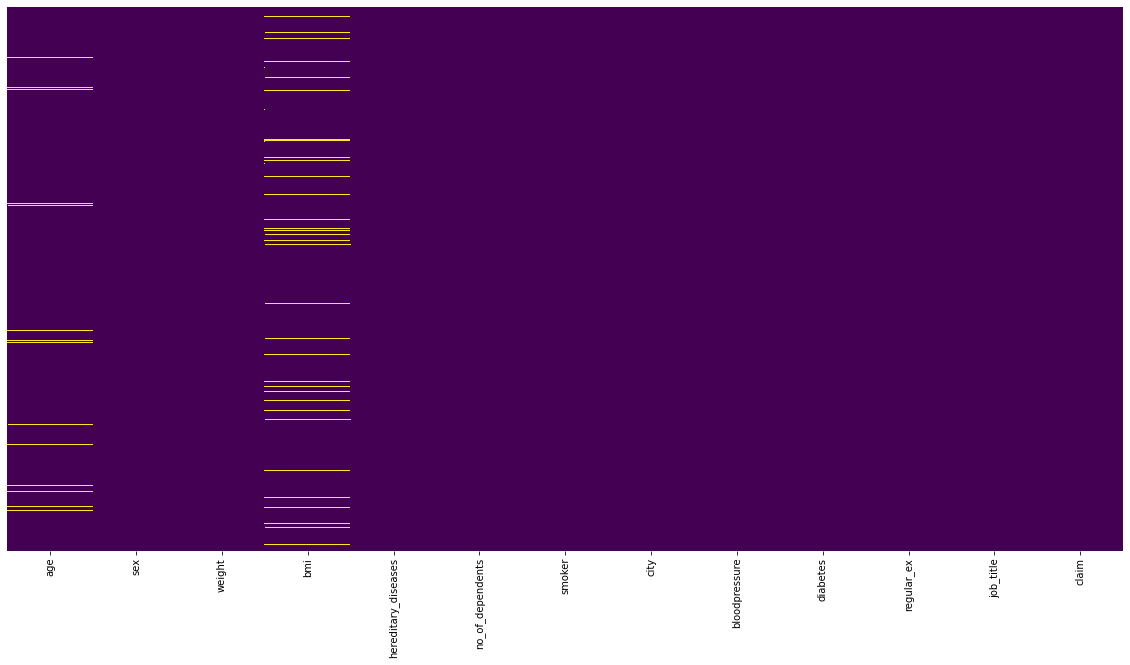

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(ids.isnull(),cbar=False,yticklabels=False,cmap='viridis')

###age and bmi have missing values
**Imputing age with mean and bmi with median values.**


#**how to Deal with Missing Values ?**
How to deal with missing data?

Depending on scenarios, you may:
###a. Drop the whole row
###b. Drop the whole column

OR replace:
###a. The missing values with mean
###b. The missing values with median
###c. Replace it based on other functions


The entire column is dropped only if most entries (80%-90%) in the column are missing. We have the option to either drop the rows containing the missing values or replace them. In our dataset, there are not many values that are missing. So, we opt to replace these values. For the variable 'age', we will replace missing values by the mean of age across the gender.



In [ ]:
ids['age'].fillna(value=ids['age'].mean(),inplace= True)

In [ ]:
ids['bmi'].fillna(value=ids['bmi'].median(),inplace= True) #using median imputation, since bmi has outliers

In [ ]:
#after handling missing values
ids.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

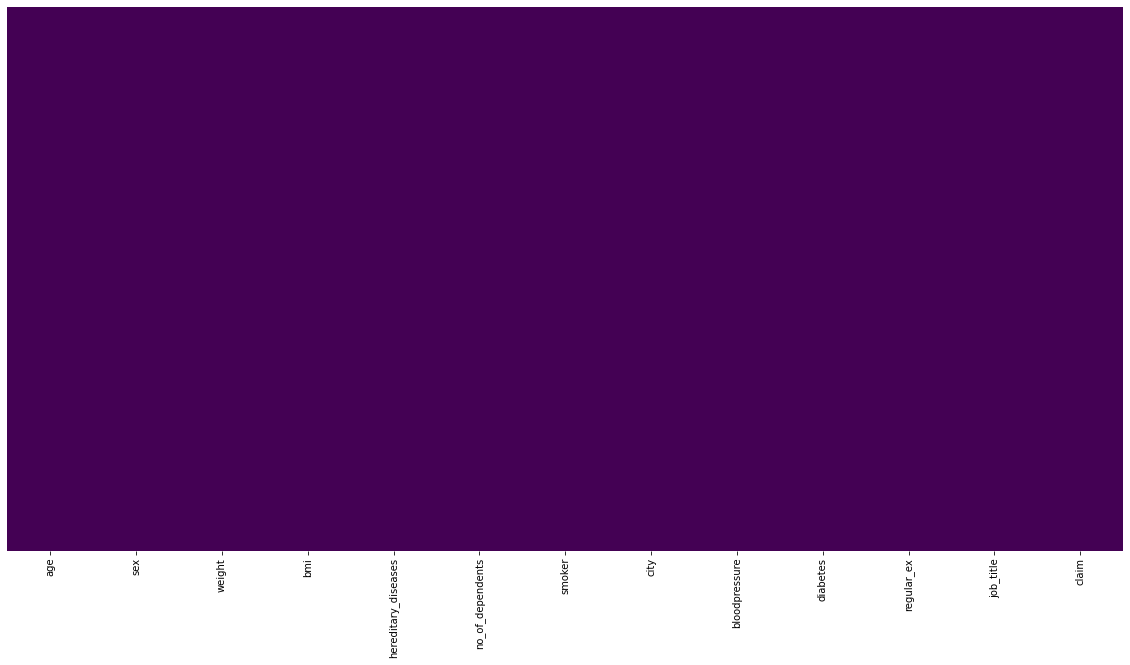

In [ ]:
# heatmap after handling missing values
plt.figure(figsize=(20,10))
sns.heatmap(ids.isnull(),cbar=False,yticklabels=False,cmap='viridis')

#**Applying transformation to claim**

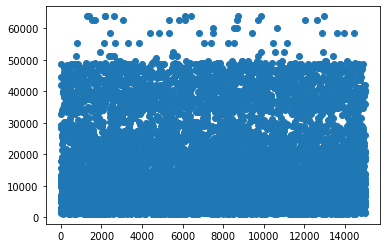

In [ ]:
plt.scatter( ids.index,ids["claim"])

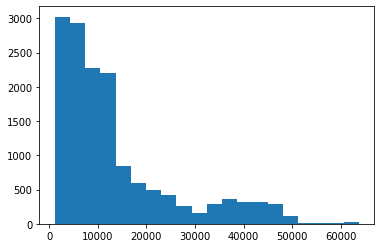

In [ ]:
#histogram before transformationn
plt.hist(x=ids['claim'],bins= 20)
plt.show()

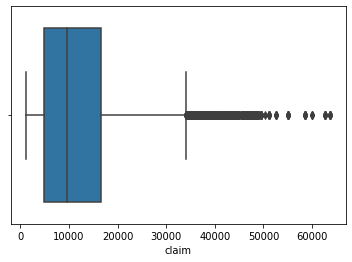

In [ ]:
#boxplot before transformation
sns.boxplot(x=ids['claim'])
plt.show()

In [ ]:
#log transformation
ids['claim']=np.log(1+ids['claim'])

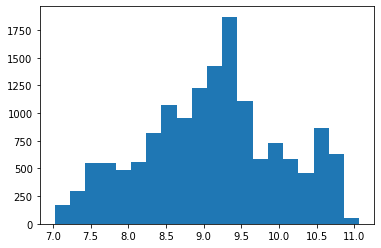

In [ ]:
#after transformation
plt.hist(x=ids['claim'],bins= 20)
plt.show()

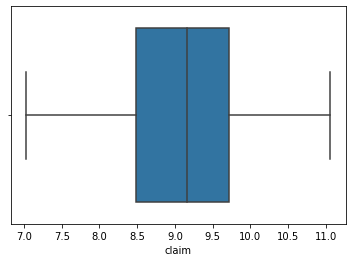

In [ ]:
#after transformation
sns.boxplot(x=ids['claim'])
plt.show()

#**dropping unnecessary columns**

In [ ]:
ids.drop(['city','weight'],axis=1,inplace=True)
#dropping weights since we already have bmi-body mass index which includes height and weight

In [ ]:
ids.head(2)

,age,sex,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,24.3,NoDisease,1,0,72,0,0,Actor,9.481405
1,49.0,female,22.6,NoDisease,1,0,78,1,1,Engineer,9.166179


# Correlation 
Correlation is the extent of linear relationship among numeric variables
It indicates the extent to which two variables increase or decrease in parallel
The value of a correlation coefficient ranges between -1 and 1
Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated.

In [ ]:
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables,since calculating correlations for categorical variables is meaning less
#round(,2) funcion rounds the correlation values to 2 digits
round(ids.select_dtypes(include=np.number).corr(),2)

,age,bmi,no_of_dependents,bloodpressure,claim
age,1.00,0.19,0.06,0.01,0.52
bmi,0.19,1.00,0.04,-0.05,0.18
no_of_dependents,0.06,0.04,1.00,0.03,0.16
bloodpressure,0.01,-0.05,0.03,1.00,0.03
claim,0.52,0.18,0.16,0.03,1.00


#Correlation visualisation

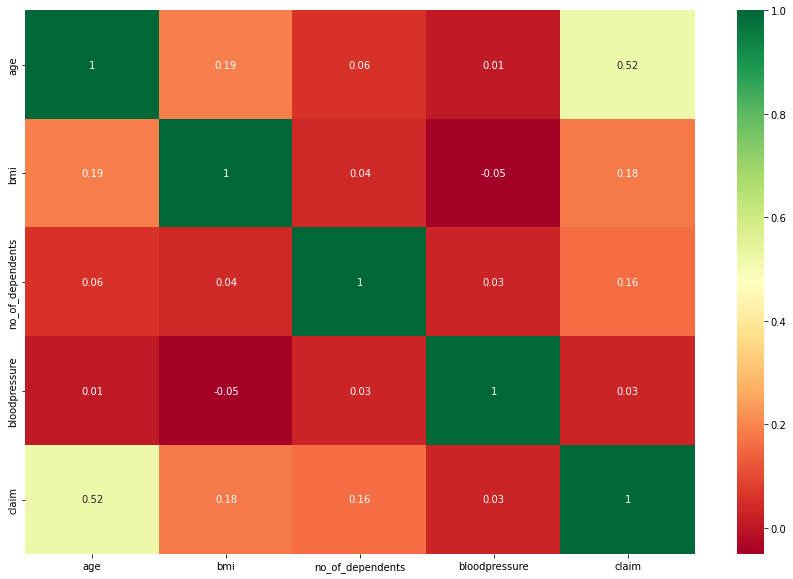

In [ ]:
plt.figure(figsize=(15,10))
g=sns.heatmap(round(ids.select_dtypes(include=np.number).corr(),2),annot=True,cmap='RdYlGn')

#**no multicollinearity found**
It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.


#**FEATURE ENGINEERING**


In [ ]:
ids['hereditary_diseases'].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [ ]:
#mapping all the classes into 3 different classes in hereditary_diseases
ids['hereditary_diseases']=ids['hereditary_diseases'].map({'NoDisease':'NoDisease', 'Epilepsy':'moderate', 'EyeDisease':'moderate', 'Alzheimer':'moderate', 'Arthritis':'moderate',
       'HeartDisease':'severe', 'Diabetes':'severe', 'Cancer':'severe', 'High BP':'moderate', 'Obesity':'moderate'})

In [ ]:
ids['hereditary_diseases'].value_counts()

NoDisease    13998
moderate       652
severe         350
Name: hereditary_diseases, dtype: int64

In [ ]:
ids['job_title'].unique()

array(['Actor', 'Engineer', 'Academician', 'Chef', 'HomeMakers', 'Dancer',
       'Singer', 'DataScientist', 'Police', 'Student', 'Doctor',
       'Manager', 'Photographer', 'Beautician', 'CA', 'Blogger', 'CEO',
       'Labourer', 'Accountant', 'FilmDirector', 'Technician',
       'FashionDesigner', 'Architect', 'HouseKeeper', 'FilmMaker',
       'Buisnessman', 'Politician', 'DefencePersonnels', 'Analyst',
       'Clerks', 'ITProfessional', 'Farmer', 'Journalist', 'Lawyer',
       'GovEmployee'], dtype=object)

In [ ]:
#mapping all the classes into 3 different classes in job_title
ids['job_title']=ids['job_title'].map({'Actor':'avg_stressed', 'Engineer':'more_stressed', 'Academician':'avg_stressed', 'Chef':'less_stressed', 'HomeMakers':'less_stressed', 'Dancer':'less_stressed',
    'Singer':'less_stressed', 'DataScientist':'avg_stressed', 'Police':'avg_stressed', 'Student':'avg_stressed', 'Doctor':'less_stressed',
   'Manager':'more_stressed', 'Photographer':'less_stressed', 'Beautician':'less_stressed', 'CA':'avg_stressed', 'Blogger':'less_stressed', 'CEO':'avg_stressed',
   'Labourer':'less_stressed', 'Accountant':'more_stressed', 'FilmDirector':'more_stressed', 'Technician':'less_stressed',
   'FashionDesigner':'avg_stressed', 'Architect':'avg_stressed', 'HouseKeeper':'less_stressed', 'FilmMaker':'avg_stressed',
   'Buisnessman':'more_stressed', 'Politician':'avg_stressed', 'DefencePersonnels':'avg_stressed', 'Analyst':'avg_stressed',
   'Clerks':'avg_stressed', 'ITProfessional':'more_stressed', 'Farmer':'less_stressed', 'Journalist':'more_stressed', 'Lawyer':'avg_stressed',
   'GovEmployee':'less_stressed'})

In [ ]:
ids['job_title'].value_counts()

avg_stressed     6792
less_stressed    5718
more_stressed    2490
Name: job_title, dtype: int64

#**Dummy Variable creation for categorical variables**
Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots which we had done earlier.


In [ ]:
ids.head(2)

,age,sex,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,24.3,NoDisease,1,0,72,0,0,avg_stressed,9.481405
1,49.0,female,22.6,NoDisease,1,0,78,1,1,more_stressed,9.166179


In [ ]:
ids=pd.get_dummies(ids)

In [ ]:
ids.head()

,age,bmi,no_of_dependents,bloodpressure,claim,sex_female,sex_male,hereditary_diseases_NoDisease,hereditary_diseases_moderate,hereditary_diseases_severe,smoker_0,smoker_1,diabetes_0,diabetes_1,regular_ex_0,regular_ex_1,job_title_avg_stressed,job_title_less_stressed,job_title_more_stressed
0,60.0,24.3,1,72,9.481405,0,1,1,0,0,1,0,1,0,1,0,1,0,0
1,49.0,22.6,1,78,9.166179,1,0,1,0,0,1,0,0,1,0,1,0,0,1
2,32.0,17.8,2,88,10.396206,1,0,0,1,0,0,1,0,1,0,1,1,0,0
3,61.0,36.4,1,72,10.789703,1,0,1,0,0,0,1,0,1,1,0,0,1,0
4,19.0,20.6,0,82,7.457436,1,0,1,0,0,1,0,0,1,1,0,0,1,0


In [ ]:
ids.drop(['sex_female','hereditary_diseases_NoDisease','job_title_avg_stressed'],axis=1,inplace=True)

In [ ]:
ids.head(2)

,age,bmi,no_of_dependents,bloodpressure,claim,sex_male,hereditary_diseases_moderate,hereditary_diseases_severe,smoker_0,smoker_1,diabetes_0,diabetes_1,regular_ex_0,regular_ex_1,job_title_less_stressed,job_title_more_stressed
0,60.0,24.3,1,72,9.481405,1,0,0,1,0,1,0,1,0,0,0
1,49.0,22.6,1,78,9.166179,0,0,0,1,0,0,1,0,1,0,1


#Note: 
Now the categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable. So for variable 'region', which has 5 levels, it has created 4 dummy encoded variables. Similarly, variable 'smoker' has 2 levels and it has created 1 dummy encoded variable.

# Independent and Dependent Columns storing in x and y

In [ ]:
x=ids.drop(['claim'],axis=1)
y=ids['claim']

In [ ]:
y

0         9.481405
1         9.166179
2        10.396206
3        10.789703
4         7.457436
           ...    
14995     9.956232
14996     8.924430
14997     7.238856
14998     9.121028
14999    10.165613
Name: claim, Length: 15000, dtype: float64

In [ ]:
x

,age,bmi,no_of_dependents,bloodpressure,sex_male,hereditary_diseases_moderate,hereditary_diseases_severe,smoker_0,smoker_1,diabetes_0,diabetes_1,regular_ex_0,regular_ex_1,job_title_less_stressed,job_title_more_stressed
0,60.0,24.3,1,72,1,0,0,1,0,1,0,1,0,0,0
1,49.0,22.6,1,78,0,0,0,1,0,0,1,0,1,0,1
2,32.0,17.8,2,88,0,1,0,0,1,0,1,0,1,0,0
3,61.0,36.4,1,72,0,0,0,0,1,0,1,1,0,1,0
4,19.0,20.6,0,82,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,28.3,1,54,1,0,0,0,1,0,1,1,0,0,0
14996,39.0,29.6,4,64,1,0,0,1,0,0,1,1,0,0,0
14997,20.0,33.3,0,52,1,0,0,1,0,0,1,1,0,0,0
14998,52.0,36.7,0,70,1,0,0,1,0,0,1,1,0,1,0


# Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#feature scaling : standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[-0.90083593,  0.65748549, -0.92731656, ..., -0.54087551,
        -0.78329678,  2.22274471],
       [ 0.33113865, -0.90824182, -0.11471259, ..., -0.54087551,
        -0.78329678, -0.44989422],
       [ 0.91089139, -1.23218541, -0.92731656, ..., -0.54087551,
        -0.78329678,  2.22274471],
       ...,
       [ 1.34570594,  1.01742281, -0.92731656, ...,  1.84885428,
        -0.78329678, -0.44989422],
       [ 0.91089139, -1.03421988,  1.51049534, ..., -0.54087551,
         1.27665531, -0.44989422],
       [ 1.05582957, -0.44032331, -0.11471259, ..., -0.54087551,
        -0.78329678, -0.44989422]])

# Importing the Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

# Prediction on test data

In [ ]:
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)
error=y_test-y_pred1

In [ ]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4,'error_lr':error})

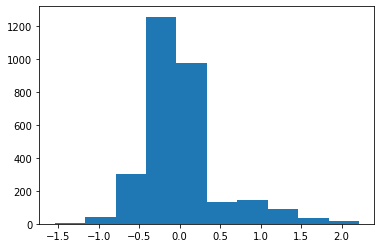

In [ ]:
#checking whether error is following normality or not[assumption of linear regression]
plt.hist(x=df1['error_lr'],bins= 10)
plt.show()

In [ ]:
df1['error_lr'].mean() #for lr errors follows approx normal distn with 0 mean  

0.005607988316851347

In [ ]:
y_test

1670      8.817890
13379     7.807307
10234     9.527084
4719      7.450312
7003      9.499504
           ...    
10346     8.953239
8469      7.037028
12765     8.941205
9431     10.456815
4202      9.302035
Name: claim, Length: 3000, dtype: float64

#**comparing performances of different models**

In [ ]:
df1.head(15)
#by comparing we can see randomforest is giving the best results

,Actual,lr,svm,rf,gr,error_lr
1670,8.817890,8.765186,8.718088,8.817890,8.822316,0.052704
13379,7.807307,8.178028,7.847239,7.807307,8.139535,-0.370721
10234,9.527084,8.827347,9.010636,9.527084,8.943645,0.699737
4719,7.450312,8.002826,7.823018,7.508806,7.737899,-0.552514
7003,9.499504,9.359668,9.542293,9.499504,9.460143,0.139835
2831,10.390511,9.311329,10.038229,10.387836,10.096307,1.079182
13014,8.447264,8.512582,8.456429,8.447264,8.542469,-0.065318
11979,8.874658,8.960987,8.974713,8.874658,9.022420,-0.086329
8610,8.129588,8.312793,8.183546,8.126480,8.366741,-0.183206
519,8.375330,8.492318,8.313992,8.375330,8.468156,-0.116988


#**Comparing Performances of different models through Visualization**

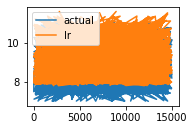

In [ ]:
#for entire data
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['lr'],label="lr")
plt.legend()

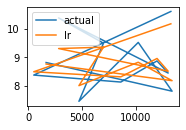

In [ ]:
#just for 10 observations to get a clear picture
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label="actual")
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()

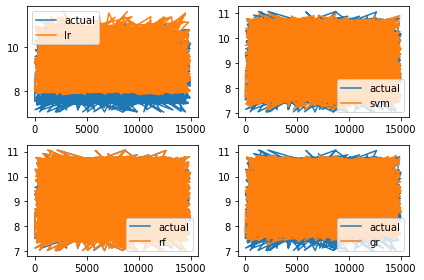

In [ ]:
#for all the data
plt.subplot(221)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['lr'],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['svm'],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['rf'],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'],label="actual")
plt.plot(df1['gr'],label="gr")

plt.tight_layout()

plt.legend()

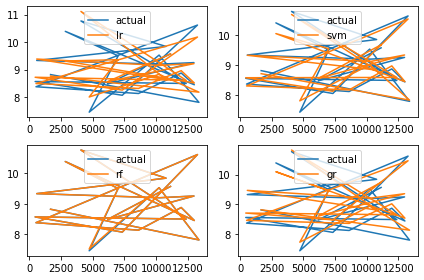

In [ ]:
#just for initial 20 observation to get a clear picture
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['lr'].iloc[0:21],label="lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['svm'].iloc[0:21],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['rf'].iloc[0:21],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:21],label="actual")
plt.plot(df1['gr'].iloc[0:21],label="gr")

plt.tight_layout()

plt.legend()

# Evaluating the algorithm

In [ ]:
from sklearn import metrics

score1= metrics.r2_score(y_test,y_pred1)
score2= metrics.r2_score(y_test,y_pred2)
score3= metrics.r2_score(y_test,y_pred3)
score4= metrics.r2_score(y_test,y_pred4)
print("R_squared values\n")
print("linear regression: ",score1,"\nsupport vector regression: ",score2,"\nrandom forest: ",score3,"\ngradient boosting",score4)

R_squared values

linear regression:  0.7394053385682049 
support vector regression:  0.8214031857109295 
random forest:  0.9779521891390628 
gradient boosting 0.8358999683311806


# Mean Square Error

In [ ]:
s1= metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3= metrics.mean_absolute_error(y_test,y_pred3)
s4= metrics.mean_absolute_error(y_test,y_pred4)
print("mean square errors\n")
print("linear regression: ",s1,"\nsupport vector regression: ",s2,"\nrandom forest: ",s3,"\ngradient boosting",s4)

mean square errors

linear regression:  0.29147870683965416 
support vector regression:  0.18154540583097797 
random forest:  0.02386115222388569 
gradient boosting 0.21313096612703725


#Hence random forest is giving the best results with 97.8% accuracy and lowest MSE.

# random forest is giving the best results for our model

# Now training our model on 100% data using random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#model training
model=RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()